# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,16.0,1.0,572.0,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,16.0,1.0,495.0,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,18.0,0.0,482.0,Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,16.0,4.0,548.0,Muda,1
4,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,17.0,0.0,580.0,Muda,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionType', 'Location','Channel', 'AgeGroup', 'CustomerOccupation']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,16.0,1.0,572.0,1,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,16.0,1.0,495.0,1,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,18.0,0.0,482.0,2,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,16.0,4.0,548.0,2,1
4,92.15,1,28,0,18.0,3,172.0,1.0,781.68,17.0,0.0,580.0,2,1


In [5]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Buat instance MinMaxScaler
# Pisahkan fitur (X) dan target (y) sebelum scaling
X = df.drop(columns=['Target'])
y = df['Target']

# Normalisasi hanya fitur numerik, bukan target
scaler = MinMaxScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1714, 13), y_train=(1714,)
Test set shape: X_test=(429, 13), y_test=(429,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [6]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
print("Model training selesai.")

Model training selesai.


In [7]:
# Menyimpan Model
import joblib
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [8]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
# menggunakan model randomforest dan naivebayes
# Definisikan dan latih setiap model
rf = RandomForestClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [9]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# valuasi model dan mengembalikan hasil dalam format DataFrame
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score (weighted)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Precision
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Recall

    # Menyimpan hasil evaluasi dalam dictionary
    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    return result

# menyimpan hasil evaluasi model dalam list
results = []

# Evaluasi setiap model
results.append(evaluate_model(dt, X_test, y_test, "Decision Tree (DT)"))
results.append(evaluate_model(rf, X_test, y_test, "Random Forest (RF)"))
results.append(evaluate_model(nb, X_test, y_test, "Naive Bayes (NB)"))
results.append(evaluate_model(knn, X_test, y_test, "KNeighborsClassifier (KNN)"))
results.append(evaluate_model(svm, X_test, y_test, "Support Vector Machine (SVM)"))

# Membuat DataFrame untuk perbandingan hasil
results_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print("===== Perbandingan Model =====")
print(results_df)

===== Perbandingan Model =====
                          Model  Accuracy  Precision    Recall  F1-Score
0            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
1            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
2              Naive Bayes (NB)  0.990676   0.990902  0.990676  0.990686
3    KNeighborsClassifier (KNN)  0.729604   0.737903  0.729604  0.731265
4  Support Vector Machine (SVM)  0.946387   0.946698  0.946387  0.946371


In [10]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
joblib.dump(rf, 'explore_Random_Forest_classification.h5')
joblib.dump(nb, 'explore_Naive_Bayes_classification.h5')
joblib.dump(knn, 'explore_KNeighborsClassifier_classification.h5')
joblib.dump(knn, 'explore_Support_Vector_Machine_classification.h5')

['explore_Support_Vector_Machine_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.

# Definisikan parameter grid untuk Grid Search KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Model terbaik hasil tuning
best_knn_grid = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_knn = best_knn_grid.predict(X_test)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters (Grid Search): {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


===== Hasil Hyperparameter Tuning KNN =====
Accuracy : 0.8228
Precision: 0.8237
Recall   : 0.8228
F1-Score : 0.8220


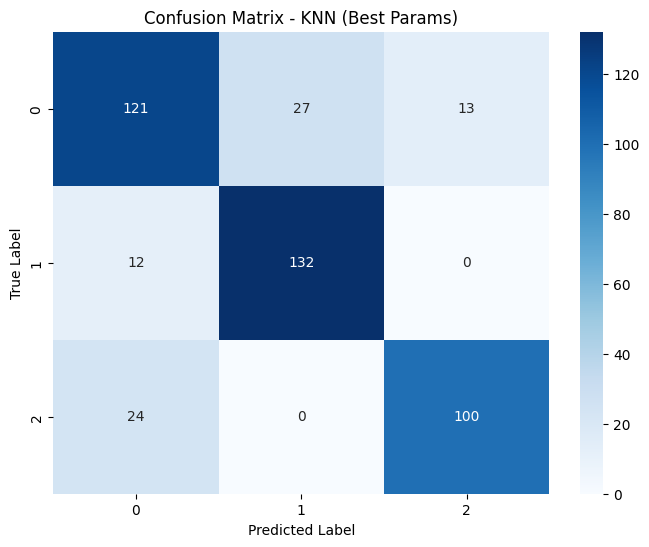

In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
print("===== Hasil Hyperparameter Tuning KNN =====")
print(f"Accuracy : {accuracy_score(y_test, y_pred_best_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_knn, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_best_knn, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_best_knn, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - KNN (Best Params)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
# Menyimpan Model hasil tuning
joblib.dump(best_knn_grid, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code